# Задание взято с [платформы](https://karpov.courses/)

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам [данные](https://disk.yandex.ru/d/h9u6tWco1EFfaA) за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

### Задания
1. Загрузите [данные](https://disk.yandex.ru/d/h9u6tWco1EFfaA), проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

### Описание данных
- `timestamp` – дата и время (точность до часа)
- `cnt` – количество аренд велосипедов за этот час
- `t1` – температура, в С
- `t2` – температура "ощущается как", в С 
- `hum` – влажность (%)
- `wind_speed` – скорость ветра, км/ч
- `weather_code` – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain 

10 – дождь с грозой

26 – снегопад 

94 – ледяной туман (да, такое бывает!)

- `isholiday` – является ли день праздником (1 – праздник, 0 – нет)
- `isweekend` –  является ли день выходным (1 – выходной, 0 – нет)
- `season` – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib.parse import urlencode
import json

### 1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [2]:
def parse_data(base_url, public_key):
    
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    return pd.read_csv(download_url)

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
data_url = 'https://disk.yandex.ru/d/h9u6tWco1EFfaA'

In [4]:
data = parse_data(base_url, data_url)
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
data.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 2. Постройте график по числу поездок по дате и времени.

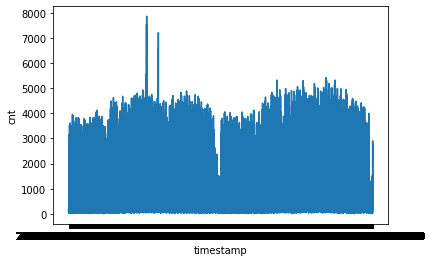

In [6]:
sns.lineplot(x='timestamp', y='cnt', data=data)

### 3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

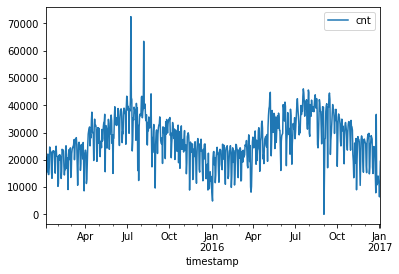

In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp']) 
data = data.set_index('timestamp')
data_agg = data.resample(rule='D').agg({'cnt':'sum'})
data_agg.plot()

### 4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3.

In [36]:
data_ema = data_agg.rolling(3).mean()
data_ema.loc['2015-07-09']

cnt    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

### 5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [18]:
c = data_ema - data_agg
std = np.std(c)
std

cnt    4558.586641
dtype: float64

### 6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

In [37]:
data_ema = data_ema.reset_index()
data_ema = data_ema.assign(
    upper_bound =data_ema.cnt+2.576*std.cnt,
    lower_bound =data_ema.cnt-2.576*std.cnt
    )

data_ema

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN
2,2015-01-06,16739.666667,28482.585854,4996.747479
3,2015-01-07,20683.000000,32425.919188,8940.080812
4,2015-01-08,19092.666667,30835.585854,7349.747479
...,...,...,...,...
726,2016-12-30,12682.000000,24424.919188,939.080812
727,2016-12-31,12347.333333,24090.252521,604.414146
728,2017-01-01,9803.666667,21546.585854,-1939.252521
729,2017-01-02,9889.333333,21632.252521,-1853.585854


### 7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии. Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

In [49]:
data_agg.reset_index()

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [52]:
merged_data = pd.merge(data_agg.reset_index(), data_ema, how='inner', on='timestamp')

In [54]:
merged_data[merged_data.cnt_x >= merged_data.upper_bound]

,timestamp,cnt_x,cnt_y,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479


### 8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [55]:
merged_data[merged_data.cnt_x <= merged_data.lower_bound]

,timestamp,cnt_x,cnt_y,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
